In [145]:
# Import required libraries
import pandas as pd
import src.classify_generic as cg
import src.format_data as fd
from matplotlib import pyplot as plt
from matplotlib.lines import Line2D
import umap

In [144]:
###########################
# Do not modify this cell #
###########################

train_gsm = pd.read_csv('./gsm/DLBCL_trainset_gsm.tsv', sep='\t', index_col=0)
train_preds = pd.read_csv('./gsm/NN_reducedV3.2_removeN5_nfeatures21_pMax0.94248563.tsv', sep='\t', index_col=0)
train_preds.columns = ['C' + str(x) for x in range(1, 6)]
train_preds['PredictedCluster'] = train_preds.idxmax(axis=1)
train_preds['Confidence'] = train_preds.loc[:, ['C1', 'C2', 'C3', 'C4', 'C5']].max(axis=1)
train_reduced_gsm = fd.construct_reduced_winning_version(train_gsm)

In [172]:
##################################
# *** Change variables here! *** #
#   Afterwards, run all cells    #
##################################

# Replace gsm_file with your GSM file name to classify your own data
gsm_file = './gsm/DLBCL_testset_gsm.tsv'

# Set your cohort name
cohort = 'testset'

# Set output file name
output_fn = './classifications/' + cohort.replace(' ', '').strip() + '_classified_samples.tsv'
print('Predictions will be written to:\n\n', output_fn)

Predictions will be written to:

 ./classifications/testset_classified_samples.tsv


In [125]:
gsm = pd.read_csv(gsm_file, sep='\t', index_col=0)
gsm.head()

,DLBCL11572,DLBCL_RICOVER_99,DLBCL_C_D_1132_NULLPAIR,DLBCL_LS4085,DLBCL_RICOVER_224,DLBCL_RICOVER_585,DLBCL_RICOVER_126,DLBCL10481,DLBCL_C_D_1104_NULLPAIR,DLBCL_RICOVER_1144,...,DLBCL11575,DLBCL_C_D_1142_NULLPAIR,DLBCL11562,DLBCL_LS2305,DLBCL_C_D_PAIR2,DLBCL_C_D_PAIR20,DLBCL_C_D_PAIR22,DLBCL_C_D_PAIR23,DLBCL_C_D_PAIR5,DLBCL_C_D_PAIR9
classifier_name,,,,,,,,,,,,,,,,,,,,,
SV.BCL6,0,0,0,0,0,3,0,0,0,3,...,0,0,0,0,0,0,0,0,0,0
DTX1,0,0,2,1,0,1,0,0,0,2,...,0,2,0,0,0,0,2,0,0,0
CD70,0,0,2,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,2,0,0
TNFAIP3,0,0,0,0,0,0,0,0,0,2,...,0,0,0,0,2,0,0,2,0,0
NOTCH2,0,0,0,0,0,0,0,0,0,0,...,2,0,0,0,0,0,0,2,0,0


In [126]:
reduced_gsm = fd.construct_reduced_winning_version(gsm)
reduced_gsm.head()

,BCL6_ALT,NOTCH2_vec,M88O_vec,C1_vec4,CD70_vec,TP53_biallelic,X21Q_AMP,Sum_C2_ARM,Sum_C2_FOCAL,BCL2_combined,...,GNA13_vec,PTEN,SV_MYC,Hist_comp,SGK1_vec,DUSP2_vec,CN_2P16_1_AMP,TBL1XR1_vec,MYD88_L265P_CD79B,Sum_C5_CNA
DLBCL11572,0,0,0,0,2,0,0,3,7,4,...,4,1,0,0,2,4,2,1,0,5
DLBCL_RICOVER_99,0,2,2,2,0,0,0,3,1,0,...,0,0,0,1,0,0,0,4,2,4
DLBCL_C_D_1132_NULLPAIR,0,4,0,6,2,0,0,0,1,0,...,1,0,0,0,4,8,0,11,0,1
DLBCL_LS4085,0,1,0,0,0,0,0,3,4,0,...,2,0,0,1,0,1,0,5,0,4
DLBCL_RICOVER_224,0,0,0,0,0,0,0,7,5,0,...,0,2,0,0,2,0,0,3,2,7


In [134]:
classified_samples = cg.classify_samples_winning_model(reduced_gsm)
classified_samples.index.name = 'sample'
classified_samples['PredictedCluster'] = classified_samples['PredictedCluster'].map({1.0: 'C1', 2.0: 'C2',
                                                                                     3.0: 'C3', 4.0: 'C4',
                                                                                     5.0: 'C5'})
classified_samples.to_csv(output_fn, sep='\t', index=True)
classified_samples

loaded nets


/Users/twood/Desktop/DLBCL-Classifier-Tool/src/nn.py:21: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  x = F.softmax(x)
/Users/twood/Desktop/DLBCL-Classifier-Tool/src/classify_generic.py:38: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  pred_df[idx] = average_output


,C1,C2,C3,C4,C5,Confidence,PredictedCluster
sample,,,,,,,
DLBCL11572,0.004164,0.007046,0.973578,0.011075,0.004137,0.973578,C3
DLBCL_RICOVER_99,0.082979,0.031134,0.009259,0.020035,0.856593,0.856593,C5
DLBCL_C_D_1132_NULLPAIR,0.191042,0.013594,0.044699,0.608126,0.142539,0.608126,C4
DLBCL_LS4085,0.014521,0.068145,0.092188,0.053822,0.771323,0.771323,C5
DLBCL_RICOVER_224,0.010460,0.148672,0.017777,0.024433,0.798658,0.798658,C5
...,...,...,...,...,...,...,...
DLBCL_C_D_PAIR20,0.016655,0.280063,0.146509,0.019758,0.537015,0.537015,C5
DLBCL_C_D_PAIR22,0.093511,0.604602,0.249694,0.032911,0.019281,0.604602,C2
DLBCL_C_D_PAIR23,0.241391,0.512314,0.016246,0.036158,0.193892,0.512314,C2


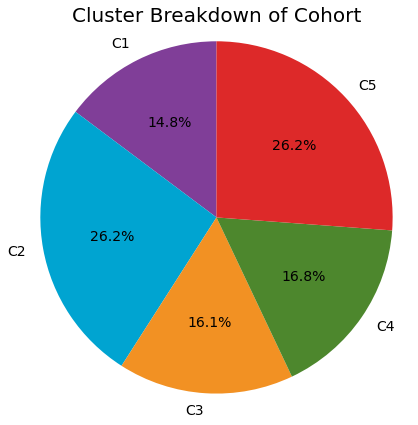

In [135]:
labels = ['C' + str(x) for x in range(1,6)]
colors = ["#803e98", "#00a4d1", "#f29123", "#4d872d", "#dd2929"]

fig1, ax1 = plt.subplots(figsize=(7,7))
ax1.pie(classified_samples['PredictedCluster'].value_counts().sort_index(), autopct='%1.1f%%', startangle=90,
       labels=labels, colors=colors, textprops={'fontsize': 14})
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
ax1.set_title('Cluster Breakdown of Cohort', size=20)

plt.show()

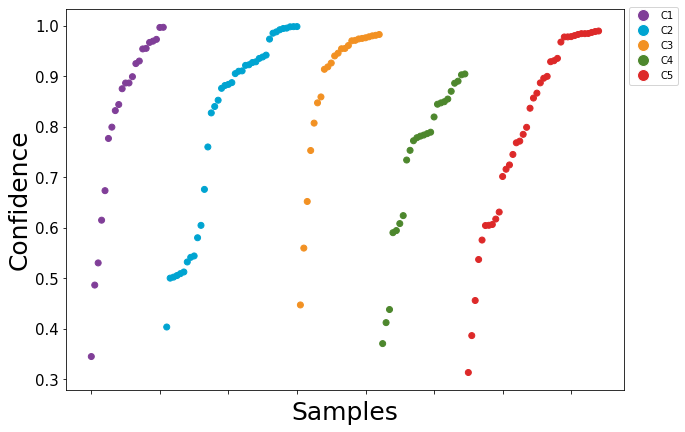

In [137]:
classified_samples_sorted = classified_samples.sort_values(by=['PredictedCluster', 'Confidence'], 
                                                           ascending=[True, True])
classified_samples_sorted['color'] = classified_samples_sorted['PredictedCluster'].map({'C1': colors[0], 
                                                                                        'C2': colors[1],
                                                                                        'C3': colors[2],
                                                                                        'C4': colors[3],
                                                                                        'C5': colors[4]})
fig, ax = plt.subplots(figsize=(10,7))
ax.scatter(range(classified_samples_sorted.shape[0]), classified_samples_sorted['Confidence'], 
            c=classified_samples_sorted['color'])
ax.set_xticklabels([])
ax.set_ylabel('Confidence', size=25)
ax.tick_params('y', labelsize=15)
ax.set_xlabel('Samples', size=25)
legend_elements = [Line2D([0], [0], marker='o', color='w', markerfacecolor=colors[0], label='C1', markersize=12),
                   Line2D([0], [0], marker='o', color='w', markerfacecolor=colors[1], label='C2', markersize=12),
                   Line2D([0], [0], marker='o', color='w', markerfacecolor=colors[2], label='C3', markersize=12),
                   Line2D([0], [0], marker='o', color='w', markerfacecolor=colors[3], label='C4', markersize=12),
                   Line2D([0], [0], marker='o', color='w', markerfacecolor=colors[4], label='C5', markersize=12)]

ax.legend(handles=legend_elements, bbox_to_anchor=(1.0, 1.02))
plt.show()

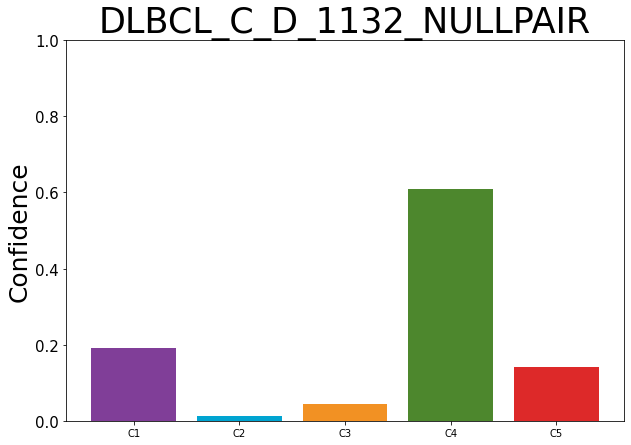

In [175]:
###########################################################
#              Individual sample bar plots.               #
# Replace sample = 'xyz' with the sample you want to see. #
###########################################################

sample = 'DLBCL_C_D_1132_NULLPAIR'
sample_prediction = classified_samples.loc[sample][['C1', 'C2', 'C3', 'C4', 'C5']]

fig, ax = plt.subplots(figsize=(10,7))
ax.bar(sample_prediction.index, sample_prediction, color=colors)
ax.set_ylabel('Confidence', size=25)
ax.tick_params('y', labelsize=15)
ax.set_ylim((0,1))
ax.set_title(sample, size=35)
plt.show()

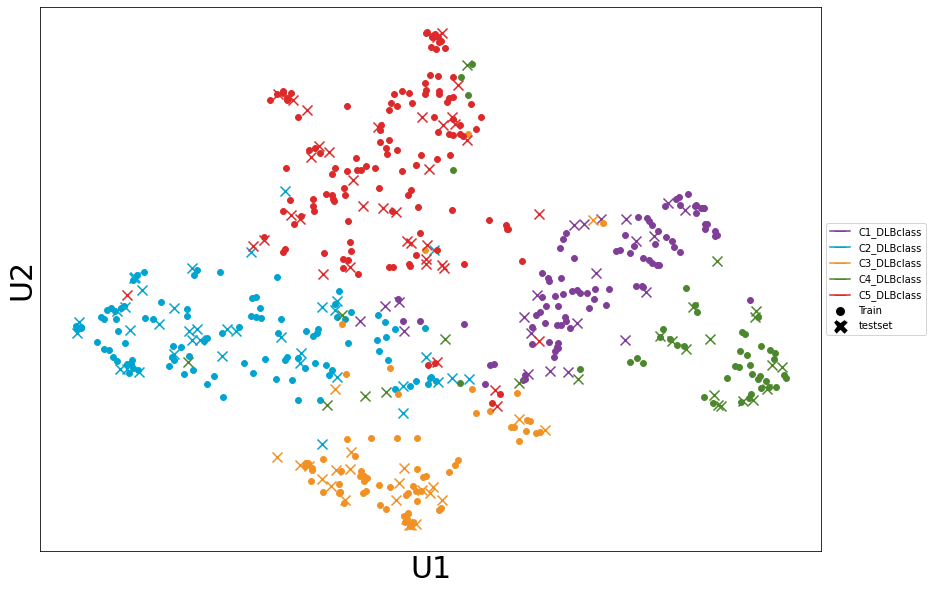

In [178]:
# UMAP plots of your classified samples 
# in context of DLBclass classified samples (thresholded > 0.70 confidence)
seed = 1
pallet = {'C1': colors[0],
          'C2': colors[1],
          'C3': colors[2],
          'C4': colors[3],
          'C5': colors[4]}

train_preds_hc = train_preds.loc[train_preds['Confidence'] > 0.70]


reduced_gsm = reduced_gsm.loc[classified_samples.index]
train_reduced_gsm_hc = train_reduced_gsm.loc[train_preds_hc.index]

reduced_gsm['set'] = cohort
reduced_gsm['cluster'] = classified_samples['PredictedCluster']
train_reduced_gsm_hc['set'] = 'DLBclass Train Set'
train_reduced_gsm_hc['cluster'] = train_preds['PredictedCluster']

combined_reduced = pd.concat([reduced_gsm, train_reduced_gsm_hc])

to_drop_umap = ['set', 'cluster']

fit = umap.UMAP(n_components=2, n_neighbors=10, min_dist=0.05, metric='euclidean', random_state=seed)
u = pd.DataFrame(fit.fit_transform(combined_reduced.drop(to_drop_umap, axis=1)))
u.index = combined_reduced.index
u.columns = ['u1', 'u2']

plt.figure(figsize=(14, 10))

for clus in ['C1', 'C2', 'C3', 'C4', 'C5']:
    clus_samples = combined_reduced.loc[combined_reduced['cluster'] == clus].index
    clus_samples_train = clus_samples[clus_samples.isin(train_preds.index)]
    clus_samples_new = clus_samples[clus_samples.isin(classified_samples.index)]

    plt.scatter(u.loc[clus_samples_train, 'u1'], u.loc[clus_samples_train, 'u2'], color=pallet[clus], marker='o', s=35)
    plt.scatter(u.loc[clus_samples_new, 'u1'], u.loc[clus_samples_new, 'u2'], color=pallet[clus], marker='x', s=100)

legend_elements = [Line2D([0], [0], marker='_', color=pallet['C1'], markerfacecolor=pallet['C1'], label='C1_DLBclass', markersize=12),
                   Line2D([0], [0], marker='_', color=pallet['C2'], markerfacecolor=pallet['C2'], label='C2_DLBclass', markersize=12),
                   Line2D([0], [0], marker='_', color=pallet['C3'], markerfacecolor=pallet['C3'], label='C3_DLBclass', markersize=12),
                   Line2D([0], [0], marker='_', color=pallet['C4'], markerfacecolor=pallet['C4'], label='C4_DLBclass', markersize=12),
                   Line2D([0], [0], marker='_', color=pallet['C5'], markerfacecolor=pallet['C5'], label='C5_DLBclass', markersize=12),
                   Line2D([0], [0], marker='o', color='w', markerfacecolor='black', label='Train', markersize=10),
                   Line2D([0], [0], marker='X', color='w', markerfacecolor='black', label=cohort, markersize=15)]

plt.legend(handles=legend_elements, loc='center left', bbox_to_anchor=(1, 0.5))
plt.ylabel('U2', size=30)
plt.xlabel('U1', size=30)
plt.xticks([])
plt.yticks([])
plt.show()

In [ ]:
# BELOW:
# Reproduce test set classification. verifies that above code is correct

In [49]:
labels = pd.read_csv('/Users/twood/Desktop/DLBCL-Classifier/data_tables/confidence_tables/baseline_probabilities.connectivity_based.sensitivity_power2.Aug_17_2022.tsv',
                    sep='\t', index_col=0)
labels = labels[labels.index.isin(classified_samples.index)]
labels = labels.loc[classified_samples.index]
labels

,C1,C2,C3,C4,C5,cluster,confidence
DLBCL11572,0.000167,0.000928,0.989218,0.009589,0.000098,3,0.989218
DLBCL_RICOVER_99,0.000905,0.002128,0.000175,0.003254,0.993538,5,0.993538
DLBCL_C_D_1132_NULLPAIR,0.257181,0.000722,0.001814,0.739772,0.000511,4,0.739772
DLBCL_LS4085,0.000673,0.004304,0.000236,0.003069,0.991717,5,0.991717
DLBCL_RICOVER_224,0.008614,0.022696,0.007139,0.013439,0.948112,5,0.948112
...,...,...,...,...,...,...,...
DLBCL_C_D_PAIR20,0.000675,0.043658,0.228452,0.003251,0.723964,5,0.723964
DLBCL_C_D_PAIR22,0.001119,0.956036,0.030609,0.011030,0.001206,2,0.956036
DLBCL_C_D_PAIR23,0.177041,0.810313,0.001105,0.001897,0.009644,2,0.810313
DLBCL_C_D_PAIR5,0.000191,0.995592,0.002089,0.000260,0.001867,2,0.995592


In [53]:
accuracy = sum(labels['cluster'] == classified_samples['PredictedCluster']) / classified_samples.shape[0]
accuracy

0.8590604026845637